In [63]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pylab as plt

In [41]:
# Path to the directory containing the CSV files
csv_directory = r'C:\Users\rdobe\OneDrive\Documents\Stack Overflow'

# Dictionary to store DataFrames
dataframes = {}

# List all CSV files in the directory
csv_files = os.listdir(csv_directory)

# Iterate through each CSV file and load into a DataFrame
for csv_file in csv_files:
    # Check if the file is a CSV file
    if csv_file.endswith('.csv'):
        # Construct the full path to the CSV file
        csv_path = os.path.join(csv_directory, csv_file)
        
        # Load CSV into DataFrame
        df = pd.read_csv(csv_path)
        
        # Store DataFrame in the dictionary with filename as key
        dataframes[csv_file] = df

# You can access and analyze each DataFrame by filename
for filename, df in dataframes.items():
    print(f"DataFrame from file: {filename}")
    print(df.head())  # Display the first few rows of the DataFrame

DataFrame from file: survey_results_public_2019.csv
   Respondent                                         MainBranch Hobbyist  \
0           1             I am a student who is learning to code      Yes   
1           2             I am a student who is learning to code       No   
2           3  I am not primarily a developer, but I write co...      Yes   
3           4                     I am a developer by profession       No   
4           5                     I am a developer by profession      Yes   

                  OpenSourcer  \
0                       Never   
1     Less than once per year   
2                       Never   
3                       Never   
4  Once a month or more often   

                                          OpenSource  \
0  The quality of OSS and closed source software ...   
1  The quality of OSS and closed source software ...   
2  The quality of OSS and closed source software ...   
3  The quality of OSS and closed source software ...   
4  OSS

In [42]:
#give each file a df name

filename_to_access = 'survey_results_public_2019.csv'

if filename_to_access in dataframes:
    df_19 = dataframes[filename_to_access]

filename_to_access = 'survey_results_public_2020.csv'

if filename_to_access in dataframes:
    df_20 = dataframes[filename_to_access]
    
filename_to_access = 'survey_results_public_2021.csv'

if filename_to_access in dataframes:
    df_21 = dataframes[filename_to_access]
    
filename_to_access = 'survey_results_public_2022.csv'

if filename_to_access in dataframes:
    df_22 = dataframes[filename_to_access]
    
filename_to_access = 'survey_results_public_2023.csv'

if filename_to_access in dataframes:
    df_23 = dataframes[filename_to_access]

In [45]:
# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)

# Display the DataFrame
df_19.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

___
Each year's survey has data on programming and database languages, so it will be possible to make longitudinal analysis. Steps:
1. clean data and split the multi-answer fields of language in workable format
2. apply data normalization technique to be able to compare data from year to year
3. combine data
4. vizualize data
5. analyze data
___

In [43]:
#Clean all data from NaN values
df_19 = df_19.dropna(subset=['LanguageWorkedWith'])
df_20 = df_20.dropna(subset=['LanguageWorkedWith'])
df_21 = df_21.dropna(subset=['LanguageHaveWorkedWith'])
df_22 = df_22.dropna(subset=['LanguageHaveWorkedWith'])
df_23 = df_23.dropna(subset=['LanguageHaveWorkedWith'])

In [46]:
#Split values in the 'Column' column by semicolon and expand them into separate columns
# Then, join them back to the original DataFrame and rename the columns
df_19_split = df_19['LanguageWorkedWith'].str.split(';', expand=True)

# Combine all values into a single Series
df_19_combined_values = df_19_split.stack()

# Get value counts of the combined Series and convert it to a DataFrame
df_19_value_counts = df_19_combined_values.value_counts().reset_index()

# Rename columns
df_19_value_counts.columns = ['Language', '2019']

#Apply simple feature scaling
df_19_value_counts['2019'] = df_19_value_counts['2019']/df_19_value_counts['2019'].max()

df_19_value_counts

,Language,2019
0,JavaScript,1.000000
1,HTML/CSS,0.936625
2,SQL,0.802850
3,Python,0.615394
4,Java,0.606511
5,Bash/Shell/PowerShell,0.540215
6,C#,0.457573
7,PHP,0.388895
8,C++,0.346578
9,TypeScript,0.312788


In [47]:
#Split values in the 'Column' column by semicolon and expand them into separate columns
# Then, join them back to the original DataFrame and rename the columns
df_20_split = df_20['LanguageWorkedWith'].str.split(';', expand=True)

# Combine all values into a single Series
df_20_combined_values = df_20_split.stack()

# Get value counts of the combined Series and convert it to a DataFrame
df_20_value_counts = df_20_combined_values.value_counts().reset_index()

# Rename columns
df_20_value_counts.columns = ['Language', '2020']

#Apply simple feature scaling
df_20_value_counts['2020'] = df_20_value_counts['2020']/df_20_value_counts['2020'].max()

df_20_value_counts

,Language,2020
0,JavaScript,1.000000
1,HTML/CSS,0.931972
2,SQL,0.809155
3,Python,0.651357
4,Java,0.594354
5,Bash/Shell/PowerShell,0.488898
6,C#,0.464711
7,PHP,0.386559
8,TypeScript,0.375509
9,C++,0.353073


In [48]:
#Split values in the 'Column' column by semicolon and expand them into separate columns
# Then, join them back to the original DataFrame and rename the columns
df_21_split = df_21['LanguageHaveWorkedWith'].str.split(';', expand=True)

# Combine all values into a single Series
df_21_combined_values = df_21_split.stack()

# Get value counts of the combined Series and convert it to a DataFrame
df_21_value_counts = df_21_combined_values.value_counts().reset_index()

# Rename columns
df_21_value_counts.columns = ['Language', '2021']

#Apply simple feature scaling
df_21_value_counts['2021'] = df_21_value_counts['2021']/df_21_value_counts['2021'].max()

df_21_value_counts

,Language,2021
0,JavaScript,1.000000
1,HTML/CSS,0.863250
2,Python,0.742568
3,SQL,0.724709
4,Java,0.544199
5,Node.js,0.522048
6,TypeScript,0.464833
7,C#,0.428910
8,Bash/Shell,0.417732
9,C++,0.374289


In [49]:
#Split values in the 'Column' column by semicolon and expand them into separate columns
# Then, join them back to the original DataFrame and rename the columns
df_22_split = df_22['LanguageHaveWorkedWith'].str.split(';', expand=True)

# Combine all values into a single Series
df_22_combined_values = df_22_split.stack()

# Get value counts of the combined Series and convert it to a DataFrame
df_22_value_counts = df_22_combined_values.value_counts().reset_index()

# Rename columns
df_22_value_counts.columns = ['Language', '2022']

#Apply simple feature scaling
df_22_value_counts['2022'] = df_22_value_counts['2022']/df_22_value_counts['2022'].max()

df_22_value_counts

,Language,2022
0,JavaScript,1.000000
1,HTML/CSS,0.842797
2,SQL,0.756346
3,Python,0.735418
4,TypeScript,0.532954
5,Java,0.509097
6,Bash/Shell,0.444760
7,C#,0.428116
8,C++,0.345025
9,PHP,0.319252


In [50]:
#Split values in the 'Column' column by semicolon and expand them into separate columns
# Then, join them back to the original DataFrame and rename the columns
df_23_split = df_23['LanguageHaveWorkedWith'].str.split(';', expand=True)

# Combine all values into a single Series
df_23_combined_values = df_23_split.stack()

# Get value counts of the combined Series and convert it to a DataFrame
df_23_value_counts = df_23_combined_values.value_counts().reset_index()

# Rename columns
df_23_value_counts.columns = ['Language', '2023']

#Apply simple feature scaling
df_23_value_counts['2023'] = df_23_value_counts['2023']/df_23_value_counts['2023'].max()

df_23_value_counts

,Language,2023
0,JavaScript,1.000000
1,HTML/CSS,0.832798
2,Python,0.774676
3,SQL,0.765073
4,TypeScript,0.611028
5,Bash/Shell (all shells),0.508894
6,Java,0.480282
7,C#,0.434259
8,C++,0.352426
9,C,0.304069


In [51]:
from functools import reduce

# List of DataFrames to be merged
dataframes = [df_19_value_counts, df_20_value_counts, df_21_value_counts, df_22_value_counts, df_23_value_counts, ]

# Merge DataFrames using reduce
combined_df = reduce(lambda left, right: pd.merge(left, right, on='Language'), dataframes)

combined_df

,Language,2019,2020,2021,2022,2023
0,JavaScript,1.000000,1.000000,1.000000,1.000000,1.000000
1,HTML/CSS,0.936625,0.931972,0.863250,0.842797,0.832798
2,SQL,0.802850,0.809155,0.724709,0.756346,0.765073
3,Python,0.615394,0.651357,0.742568,0.735418,0.774676
4,Java,0.606511,0.594354,0.544199,0.509097,0.480282
5,C#,0.457573,0.464711,0.428910,0.428116,0.434259
6,PHP,0.388895,0.386559,0.338328,0.319252,0.292115
7,C++,0.346578,0.353073,0.374289,0.345025,0.352426
8,TypeScript,0.312788,0.375509,0.464833,0.532954,0.611028
9,C,0.304244,0.321648,0.323381,0.294813,0.304069


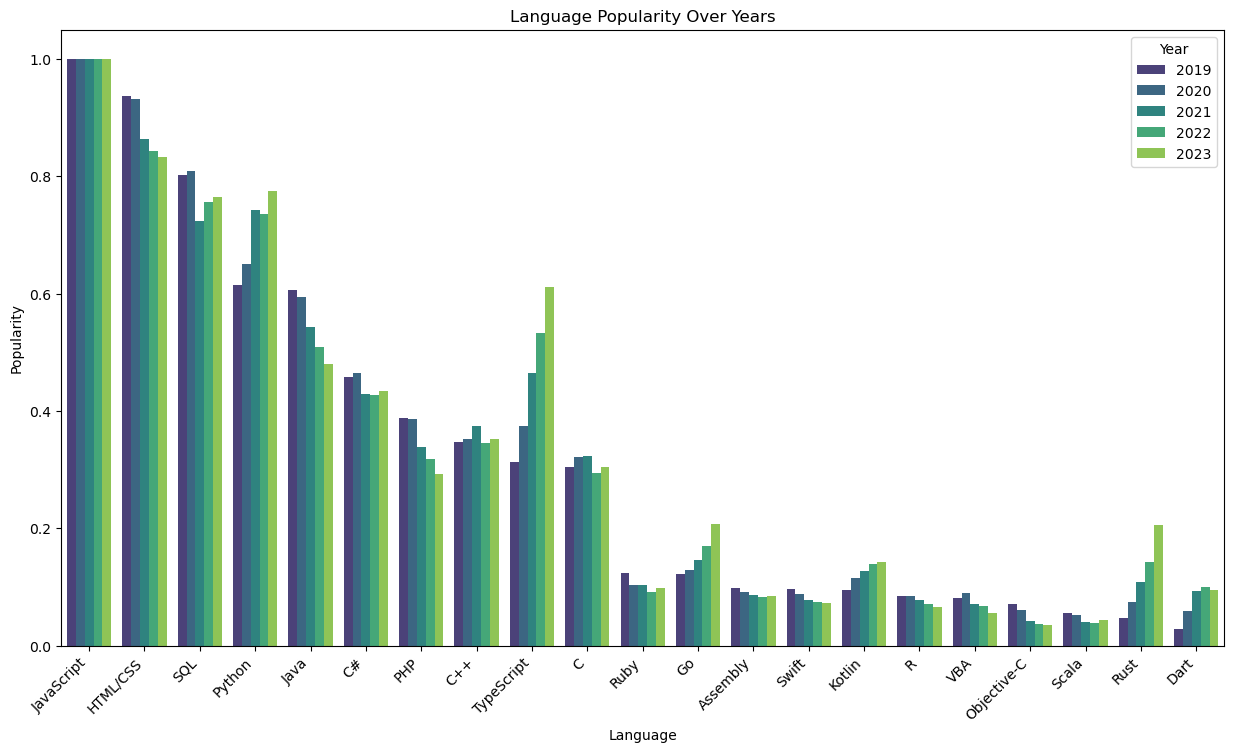

In [54]:
# Melt the DataFrame to have a single column for the years
df_melted = combined_df.melt(id_vars='Language', var_name='Year', value_name='Value')

# Create a bar plot with gradient colors
plt.figure(figsize=(15, 8))
sns.barplot(data=df_melted, x='Language', y='Value', hue='Year', palette='viridis')

# Set labels and title
plt.title('Language Popularity Over Years')
plt.xlabel('Language')
plt.ylabel('Popularity')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
#plt.tight_layout()
plt.show()

___
**Key insights**

* JavaScript is the most popular language.
* HTML/CSS and SQL maintain high popularity, with SQL seeing a slight increase in 2023.
* Python has a significant presence and shows an increase in 2023, possibly overtaking HTML/CSS and JavaScript if the trend continues.
* Java, C#, PHP, C++ and C show a steady popularity, with a dip in recent years.
* TypeScript shows a remarkable surge in popularity over years. 
* Other languages have lower popularity with peaks and troughs.
* Go, Kotlin, Rust and Dart show significant growth.

Trend is strong towards languages associated with web development, data science, and modern app development, with TypeScript, Swift, Kotlin, Rust, and Dart being ones to watch due to their rising popularity in 2023.

___
Similar process for **database management system popularity**
___

In [59]:
# starting with original dataset again before applying each specific NaN removal criterion.

# Path to the directory containing the CSV files
csv_directory = r'C:\Users\rdobe\OneDrive\Documents\Stack Overflow'

# Dictionary to store DataFrames
dataframes = {}

# List all CSV files in the directory
csv_files = os.listdir(csv_directory)

# Iterate through each CSV file and load into a DataFrame
for csv_file in csv_files:
    # Check if the file is a CSV file
    if csv_file.endswith('.csv'):
        # Construct the full path to the CSV file
        csv_path = os.path.join(csv_directory, csv_file)
        
        # Load CSV into DataFrame
        df = pd.read_csv(csv_path)
        
        # Store DataFrame in the dictionary with filename as key
        dataframes[csv_file] = df

# You can access and analyze each DataFrame by filename
for filename, df in dataframes.items():
    print(f"DataFrame from file: {filename}")
    print(df.head())  # Display the first few rows of the DataFrame

DataFrame from file: survey_results_public_2019.csv
   Respondent                                         MainBranch Hobbyist  \
0           1             I am a student who is learning to code      Yes   
1           2             I am a student who is learning to code       No   
2           3  I am not primarily a developer, but I write co...      Yes   
3           4                     I am a developer by profession       No   
4           5                     I am a developer by profession      Yes   

                  OpenSourcer  \
0                       Never   
1     Less than once per year   
2                       Never   
3                       Never   
4  Once a month or more often   

                                          OpenSource  \
0  The quality of OSS and closed source software ...   
1  The quality of OSS and closed source software ...   
2  The quality of OSS and closed source software ...   
3  The quality of OSS and closed source software ...   
4  OSS

In [60]:
#give each file a df name

filename_to_access = 'survey_results_public_2019.csv'

if filename_to_access in dataframes:
    df_19 = dataframes[filename_to_access]

filename_to_access = 'survey_results_public_2020.csv'

if filename_to_access in dataframes:
    df_20 = dataframes[filename_to_access]
    
filename_to_access = 'survey_results_public_2021.csv'

if filename_to_access in dataframes:
    df_21 = dataframes[filename_to_access]
    
filename_to_access = 'survey_results_public_2022.csv'

if filename_to_access in dataframes:
    df_22 = dataframes[filename_to_access]
    
filename_to_access = 'survey_results_public_2023.csv'

if filename_to_access in dataframes:
    df_23 = dataframes[filename_to_access]

In [61]:
#Clean all data from NaN values
df_19 = df_19.dropna(subset=['DatabaseWorkedWith'])
df_20 = df_20.dropna(subset=['DatabaseWorkedWith'])
df_21 = df_21.dropna(subset=['DatabaseHaveWorkedWith'])
df_22 = df_22.dropna(subset=['DatabaseHaveWorkedWith'])
df_23 = df_23.dropna(subset=['DatabaseHaveWorkedWith'])

In [65]:
#rename column header to be able to do automated code for 'DatabaseWorkedWith'
df_21 = df_21.rename(columns={'DatabaseHaveWorkedWith': 'DatabaseWorkedWith'})
df_22 = df_22.rename(columns={'DatabaseHaveWorkedWith': 'DatabaseWorkedWith'})
df_23 = df_23.rename(columns={'DatabaseHaveWorkedWith': 'DatabaseWorkedWith'})

In [71]:
def process_dataframe(df, year):
    # Split values in the 'DatabaseWorkedWith' column by semicolon and expand them into separate columns
    df_split = df['DatabaseWorkedWith'].str.split(';', expand=True)

    # Combine all values into a single Series and stack them
    df_combined_values = df_split.stack()

    # Get value counts of the combined Series and convert it to a DataFrame
    df_value_counts = df_combined_values.value_counts().reset_index()

    # Rename columns
    df_value_counts.columns = ['Database', str(year)]

    # Apply simple feature scaling
    df_value_counts[str(year)] = df_value_counts[str(year)] / df_value_counts[str(year)].max()
    
    return df_value_counts

# Assuming df_19, df_20, df_21, df_22, and df_23 are already loaded and ready
df_19_processed = process_dataframe(df_19, 2019)
df_20_processed = process_dataframe(df_20, 2020)
df_21_processed = process_dataframe(df_21, 2021)
df_22_processed = process_dataframe(df_22, 2022)
df_23_processed = process_dataframe(df_23, 2023)

# You can then concatenate or merge these processed DataFrames as needed

df_19_processed

,Database,2019
0,MySQL,1.000000
1,PostgreSQL,0.635419
2,Microsoft SQL Server,0.606606
3,SQLite,0.584972
4,MongoDB,0.471174
5,Redis,0.344648
6,MariaDB,0.305918
7,Oracle,0.304734
8,Elasticsearch,0.264450
9,Firebase,0.237117


In [68]:
# List of DataFrames to be merged
dataframes = [df_19_processed, df_20_processed, df_21_processed, df_22_processed, df_23_processed]

# Merge DataFrames using reduce
combined_df = reduce(lambda left, right: pd.merge(left, right, on='Database'), dataframes)

combined_df

,Database,2019,2020,2021,2022,2023
0,MySQL,1.000000,1.000000,1.000000,1.000000,0.902031
1,PostgreSQL,0.635419,0.649225,0.805463,0.930505,1.000000
2,Microsoft SQL Server,0.606606,0.592765,0.535464,0.573457,0.558767
3,SQLite,0.584972,0.560035,0.641390,0.683275,0.678278
4,MongoDB,0.471174,0.474836,0.551985,0.604067,0.560199
5,Redis,0.344648,0.328604,0.412366,0.472335,0.447993
6,MariaDB,0.305918,0.301607,0.342543,0.382609,0.386577
7,Oracle,0.304734,0.295911,0.251296,0.245231,0.215045
8,Elasticsearch,0.264450,0.247360,0.264417,0.260519,0.293993
9,Cassandra,0.064065,0.060017,0.053076,0.056697,0.055201


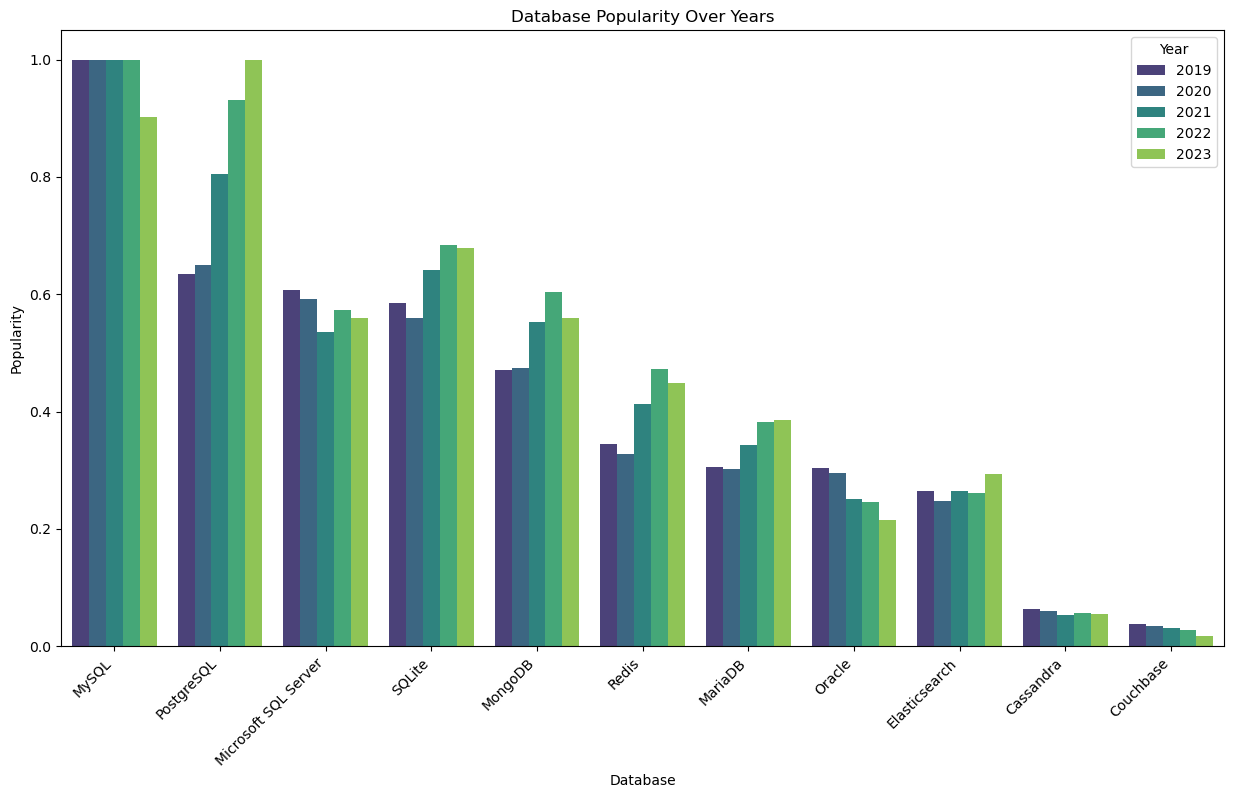

In [69]:
# Melt the DataFrame to have a single column for the years
df_melted = combined_df.melt(id_vars='Database', var_name='Year', value_name='Value')

# Create a bar plot with gradient colors
plt.figure(figsize=(15, 8))
sns.barplot(data=df_melted, x='Database', y='Value', hue='Year', palette='viridis')

# Set labels and title
plt.title('Database Popularity Over Years')
plt.xlabel('Database')
plt.ylabel('Popularity')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
#plt.tight_layout()
plt.show()


___
**Key insights**

* MySQL is the leading database with only recent decline in popularity.
* PostgreSQL has a consistent increase in rank across the years, finally becoming the leader. This is the greatest progress between others. 
* Microsoft SQL Server dipped in popularity.
* All other database management systems remain moderately popular with minor fluctuations.

Just like with coding languages traditional SQL databases remain consistently favored. 
There's also a notable decline in popularity for most databases in 2023, except PostgreSQL, which shows resilience or growth.